### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTh1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh1.csv")
training_df, val_df, test_df = split_dataset(ETTh1, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 96
future_steps = round(48)
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]

#### ETTh1

#### RLinear

Random seed set as 42
Rlinear activated
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 10.999544083595277

Epoch 0: 

Train metrics: -------
Running (training) loss is 9.360587580843777.
Training MAE is 0.8309064915640662.
Training MSE is 9.430441256353118.
Training MAPE is 1175568576.7187953.

Val metrics: -------
Running (validation) loss is 5.035232577323914.
Validation MAE is 0.6131773105689458.
Validation MSE is 5.089737268515996.
Validation MAPE is 0.050448843882020034.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 7.304405443382263

Epoch 1: 

Train metrics: -------
Running (training) loss is 6.277854048774103.
Training MAE is 0.6859396333592627.
Training MSE is 6.3584477738749685.
Training MAPE is 1478671779.9473166.

Val metrics: -------
Running (validation) loss is 3.659222341094698.
Validation MAE is 0.5247178643090

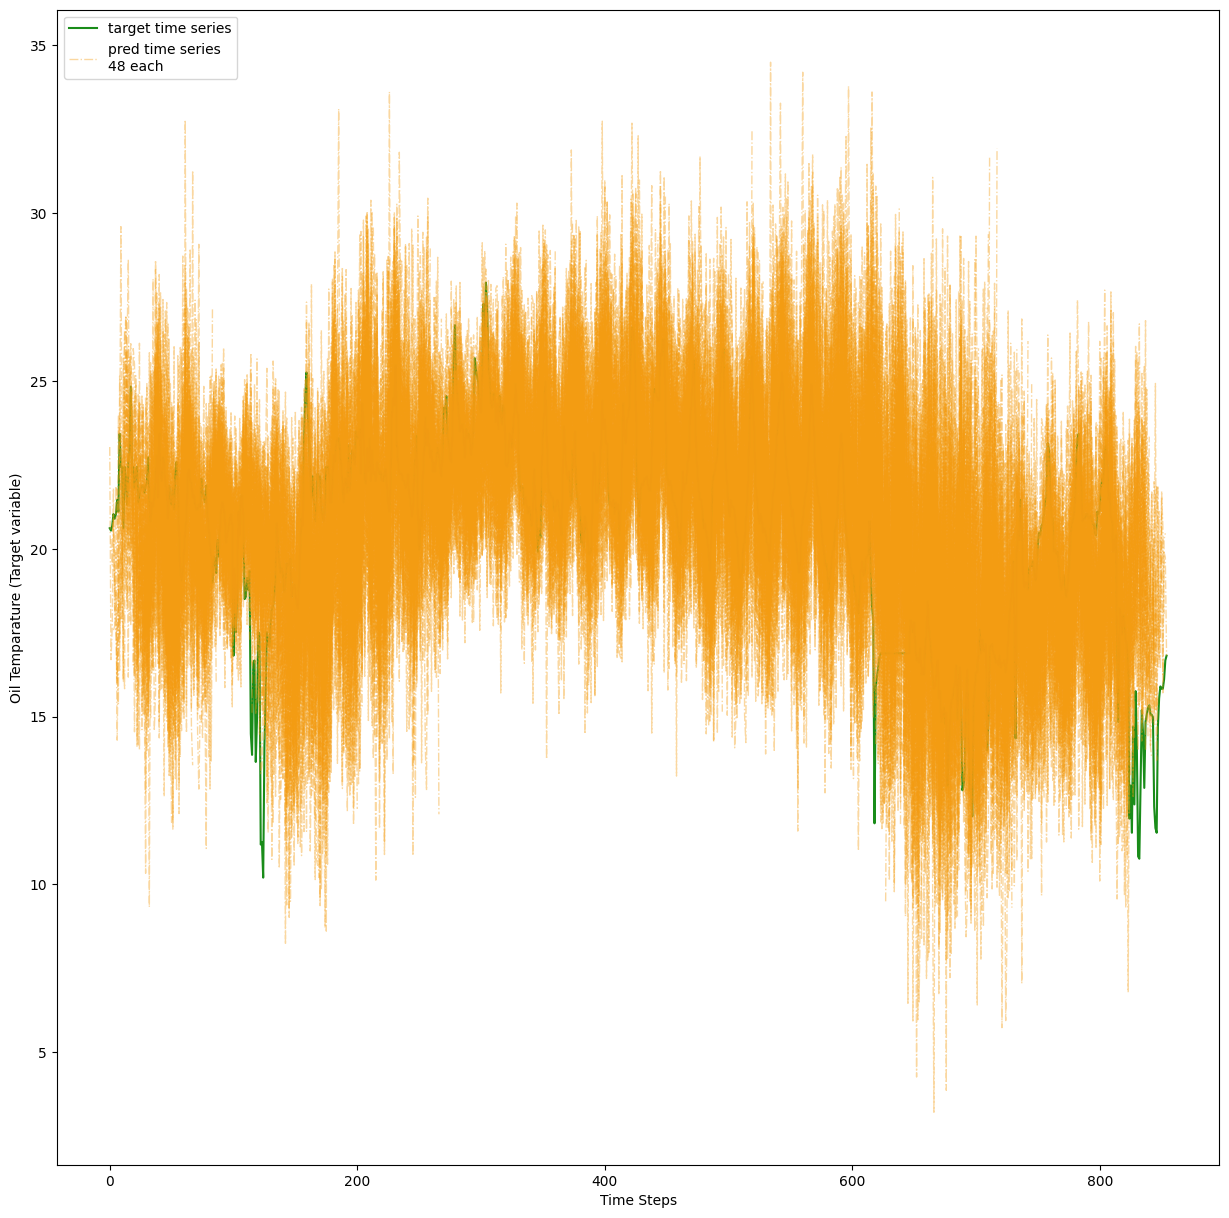

In [4]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
#evaluate_on_test_data(test_data = test_data, neural_net = net)

#### Dlinear

Random seed set as 42
Dlinear activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 6.632492609596253

Epoch 0: 

Train metrics: -------
Running (training) loss is 5.452497994888681.
Training MAE is 0.6338918259438255.
Training MSE is 5.514358583377707.
Training MAPE is 1217443474.2613165.

Val metrics: -------
Running (validation) loss is 8.537687117031643.
Validation MAE is 0.8512965894596918.
Validation MSE is 8.611396575655256.
Validation MAPE is 0.0768690346713577.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 4.489665926170349

Epoch 1: 

Train metrics: -------
Running (training) loss is 3.8555670579274497.
Training MAE is 0.5480263332802605.
Training MSE is 3.938481183271222.
Training MAPE is 1705234887.9456632.

Val metrics: -------
Running (validation) loss is 9.696782257556915.
Validation MAE is 0.9102055494274411.
Validation MSE is 9.769192522934505.
Validation MAPE is 0.08299172393977643.
-----------------------

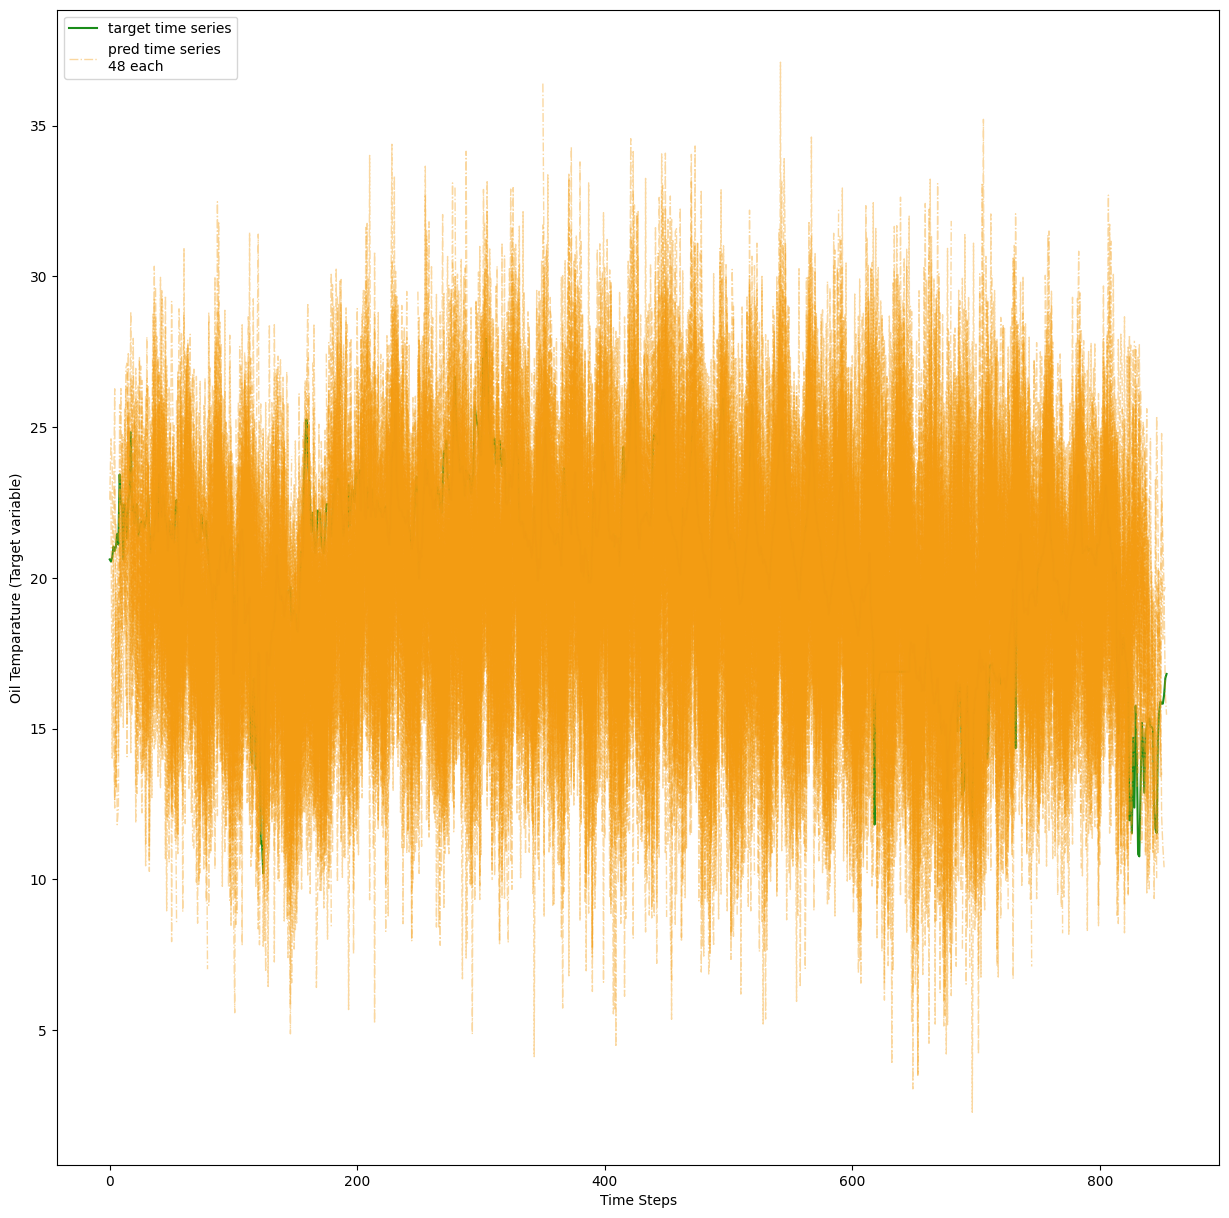

In [6]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### RLMP

Random seed set as 42
RMLP activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 15.896749710655213

Epoch 0: 

Train metrics: -------
Running (training) loss is 12.099353654249576.
Training MAE is 0.9272524637266122.
Training MSE is 12.181925315489455.
Training MAPE is 1343002769.541099.

Val metrics: -------
Running (validation) loss is 5.008225234236036.
Validation MAE is 0.6148917666503362.
Validation MSE is 5.063591546331133.
Validation MAPE is 0.05167547324938433.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 5.457519703102112

Epoch 1: 

Train metrics: -------
Running (training) loss is 4.562997667791673.
Training MAE is 0.5840033062542602.
Training MSE is 4.639100506334473.
Training MAPE is 1069009771.1890581.

Val metrics: -------
Running (validation) loss is 2.407805372987475.
Validation MAE is 0.42687585128205163.
Validation MSE is 2.4663553956576756.
Validation MAPE is 0.036030277745532135.
------------------

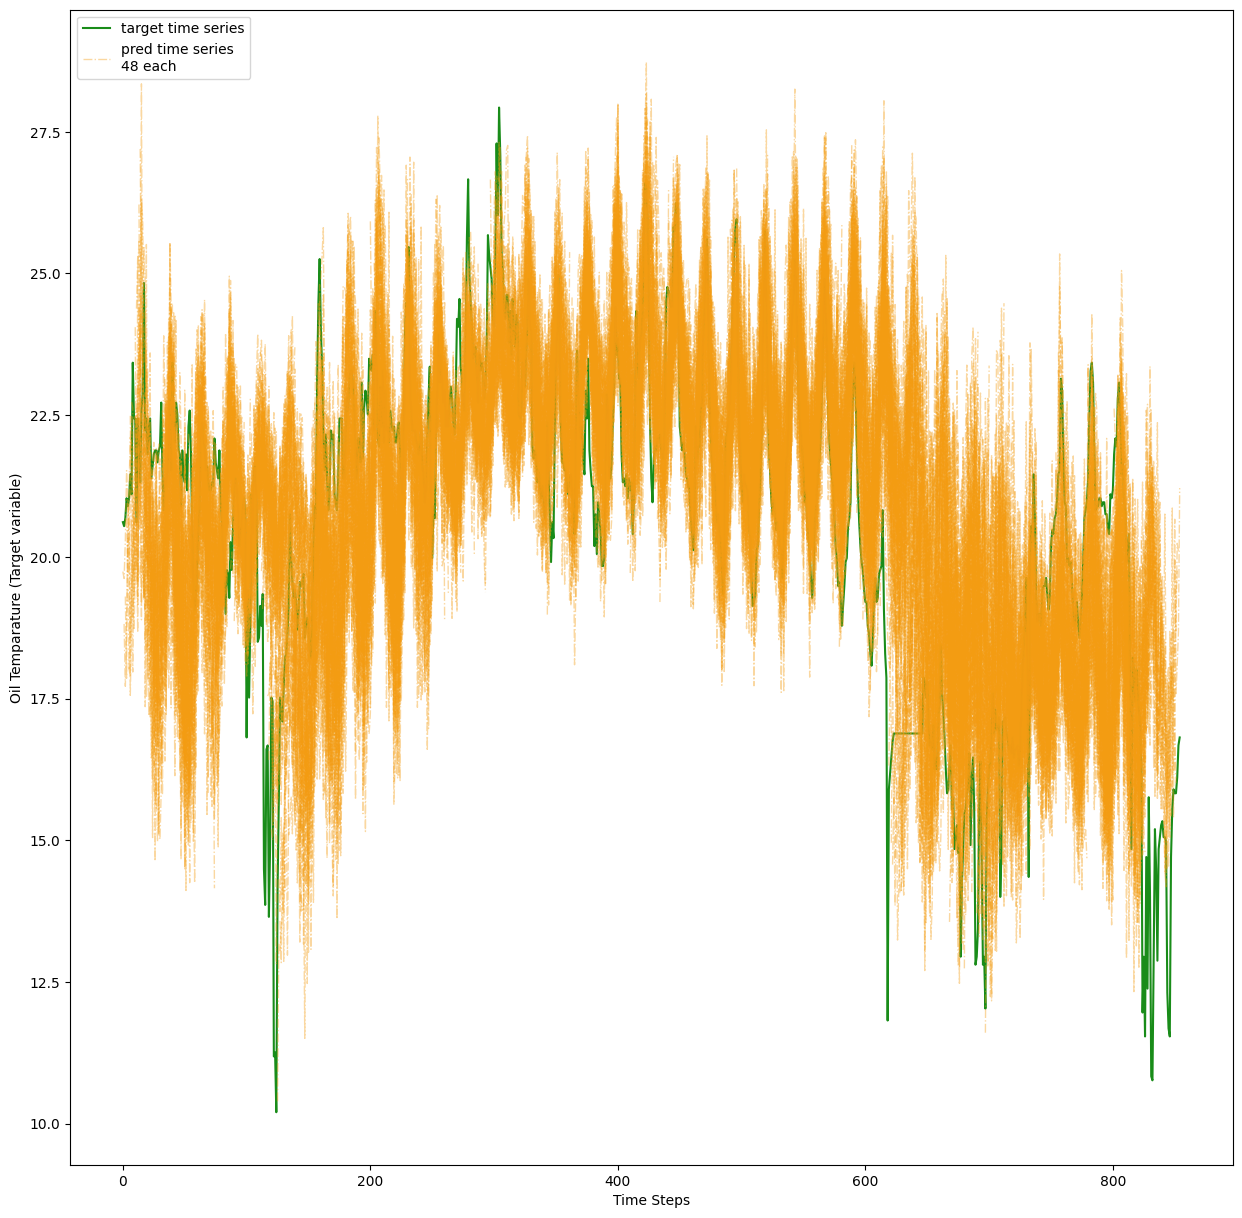

In [7]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rmlp'
            )

test_data = DataLoader(TimeSeriesDataset(val_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)